In [75]:
#INSTRUCTIONS FOR USERS.
#READ THE BLUE TEXT AT THE TOP OF EACH BOX AND FOLLOW THE INSTRUCTIONS PROVIDED.

#For this to work, you need to have installed Python.

#https://www.python.org/downloads/

#You also need to install some packages. Use "pip" to do this. Follow the link below:

#https://pypi.org/project/pip/

#Click the ">Run" button above.

In [76]:
#Click run. This box imports all the necessary packages. 
#If you get an error message, you probably need to install a package using pip, as above.

import numpy as np
import os
import os.path
import glob
import matplotlib.pyplot as plt
from skimage import io, color, measure
from skimage.measure import regionprops, label
import skimage.filters
import math
from PIL import Image, ImageFilter, ImageOps
from matplotlib import image
import cv2
import pandas as pd
from scipy import ndimage
from aicsimageio import AICSImage
from scipy.ndimage import gaussian_filter

In [77]:
#Click run.
#This box asks you for the folder which contains your images. You can only analyse folders containing only one phase image
#and no more than two fluorescent channels (only one fluorescent image of each wavelength). 

img_path = input("Please paste the path of the folder containing your images: ")

#Check images are found within the desired directory

images = os.listdir(img_path)

print("""These are the files in your specified folder:
""")

ext = ('.czi') #czi is the only accepted file extension. 

for img in images:
    if img.endswith(ext):
        print(img)
    else:
        continue
    
print("""
Ensure your expected images are contained within.""")

Please paste the path of the folder containing your images: C:\Users\jmd209\Dropbox\2020-present_mc\Data\Organised\20230116 Cell surface project\VSG\VSG cell lines validation\20230221_Final_screen_of_tagged_VSGs\Experiment 2\SpyTag clone 2 x40
These are the files in your specified folder:

Snap-10338.czi
Snap-10339.czi
Snap-10340.czi
Snap-10341.czi
Snap-10342.czi
Snap-10343.czi
Snap-10344.czi
Snap-10345.czi

Ensure your expected images are contained within.


In [78]:
#Please specificy a project name. I would use the common name between the files listed above.

project_name = input("Please name the project. I recommend the name of the working directory of your images. ")

Please name the project. I recommend the name of the working directory of your images. Spy


Please type a unique identifier for the first czi file in your working directory (e.g. Snap-12100): 10338
You have 2 channel/s in your czi file. Here is a preview of what shall be processed. 


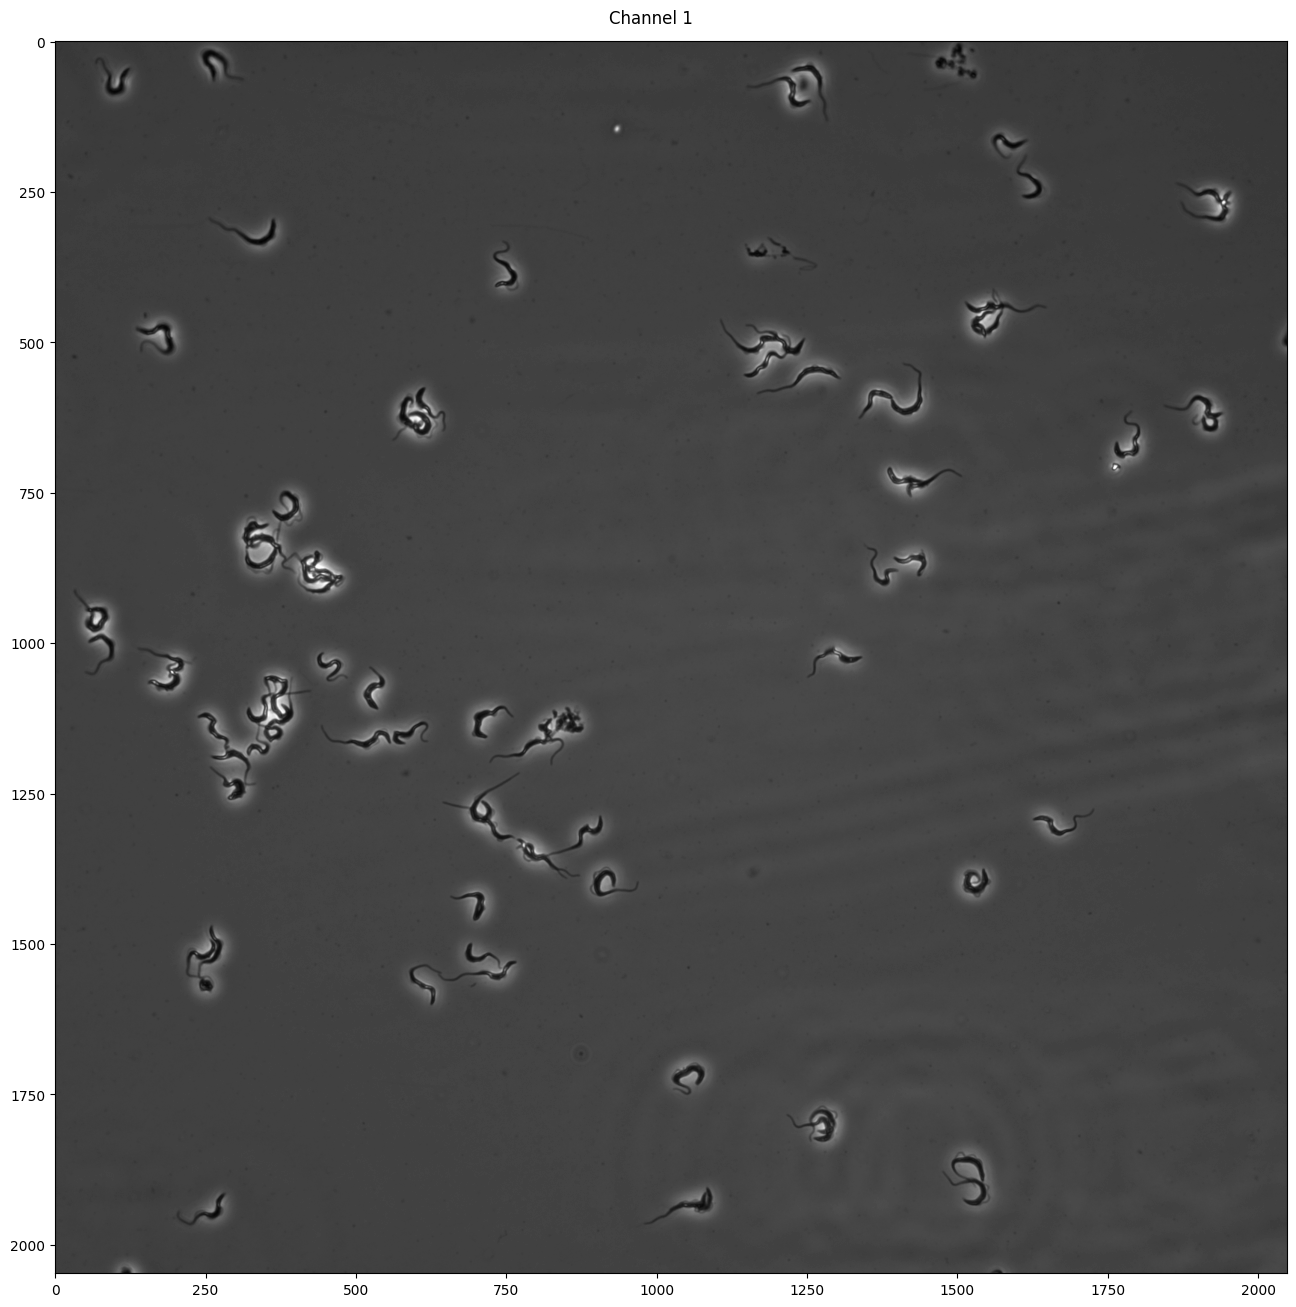

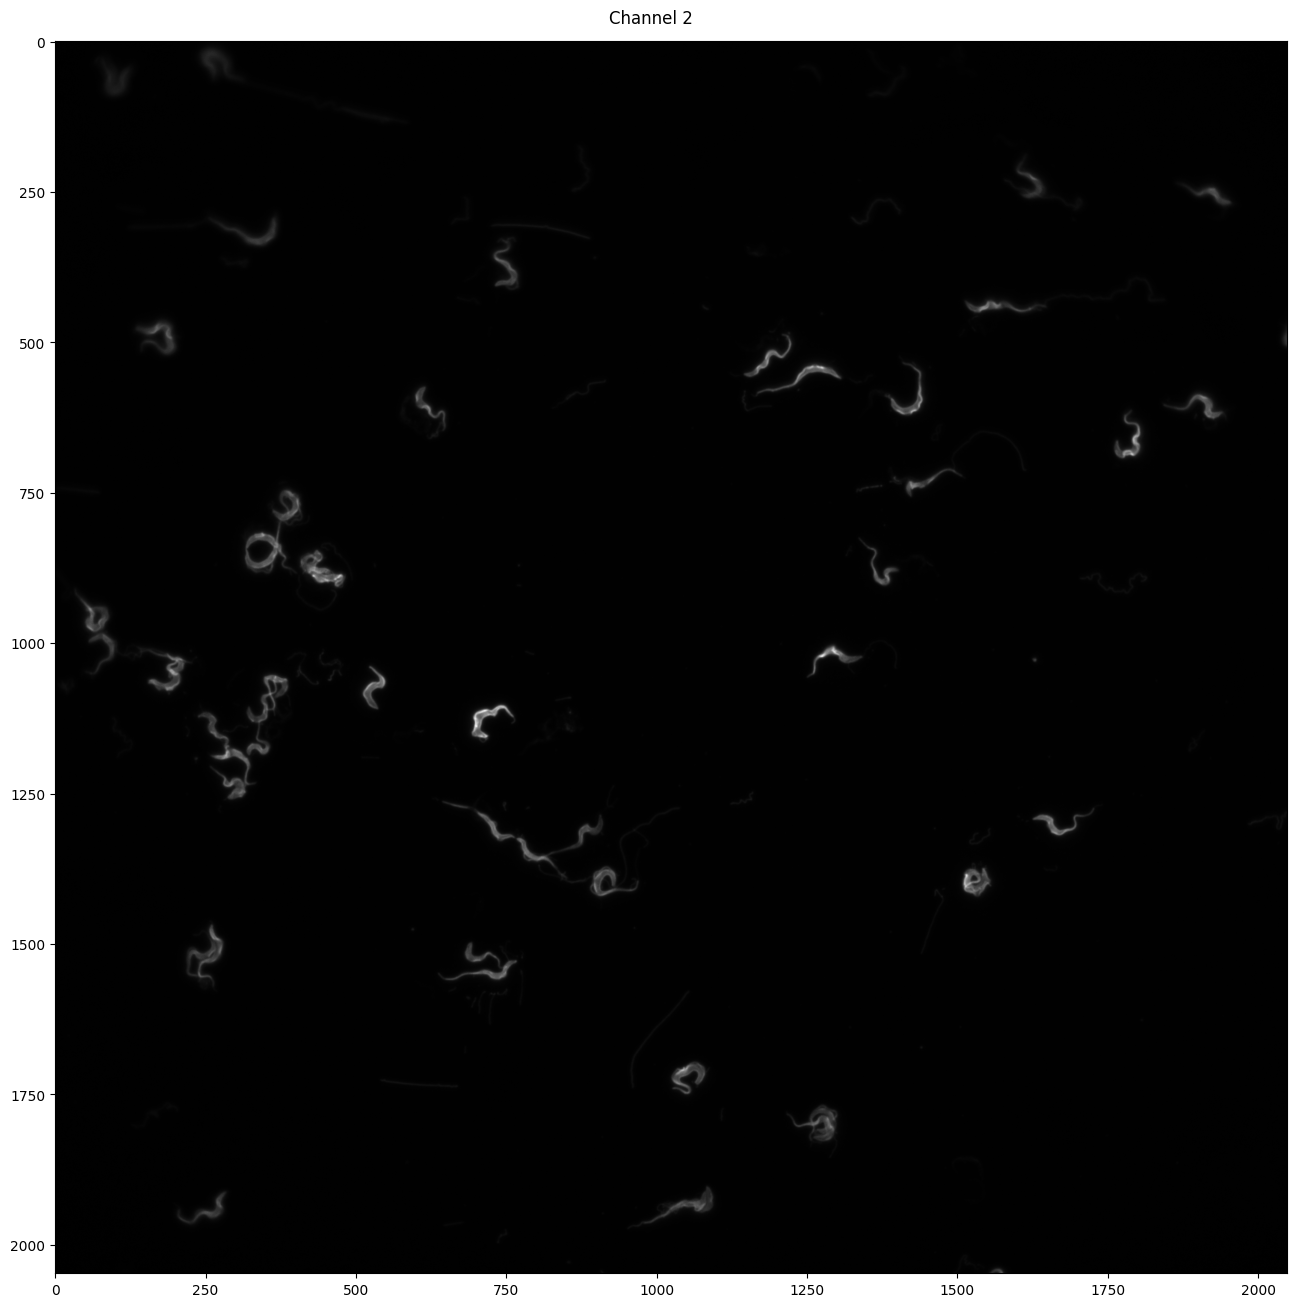

In [79]:
#Extract data from the first czi in the folder.

active_ID = input("Please type a unique identifier for the first czi file in your working directory (e.g. Snap-12100): ")
for image in glob.glob(img_path+"\\*.czi"):
    if active_ID in image:
        file = AICSImage(image)
        num_channels = file.shape[1]
        print("You have", num_channels, "channel/s in your czi file. Here is a preview of what shall be processed. ")
        if num_channels > 4:
            print("THE MAX NUMBER OF ALLOWED CHANNELS FOR THIS ANALYSIS IS 4 (FOUR). YOU HAVE TOO MANY.")
            break
        elif num_channels == 1:
            channel1_data = file.get_image_data("ZYX", C=0, S=0, T=0)
            channel1_data = channel1_data[0,:,:] #Had to extract the 2048x2048 array from within the 3D array
            plt.figure(figsize=(16,16))
            plt.suptitle("Channel 1", y=0.9)
            plt.imshow(channel1_data, cmap='gray')
        elif num_channels == 2:
            channel1_data = file.get_image_data("ZYX", C=0, S=0, T=0)
            channel1_data = channel1_data[0,:,:] #Had to extract the 2048x2048 array from within the 3D array
            plt.figure(figsize=(16,16))
            plt.suptitle("Channel 1", y=0.9)
            plt.imshow(channel1_data, cmap='gray')           
            channel2_data = file.get_image_data("ZYX", C=1, S=0, T=0)
            channel2_data = channel2_data[0,:,:] #Had to extract the 2048x2048 array from within the 3D array
            plt.figure(figsize=(16,16))
            plt.suptitle("Channel 2", y=0.9)
            plt.imshow(channel2_data, cmap='gray')        
        elif num_channels == 3:
            channel1_data = file.get_image_data("ZYX", C=0, S=0, T=0)
            channel1_data = channel1_data[0,:,:] #Had to extract the 2048x2048 array from within the 3D array
            plt.figure(figsize=(16,16))
            plt.suptitle("Channel 1", y=0.9)
            plt.imshow(channel1_data, cmap='gray')           
            channel2_data = file.get_image_data("ZYX", C=1, S=0, T=0)
            channel2_data = channel2_data[0,:,:] #Had to extract the 2048x2048 array from within the 3D array
            plt.figure(figsize=(16,16))
            plt.suptitle("Channel 2", y=0.9)
            plt.imshow(channel2_data, cmap='gray')  
            channel3_data = file.get_image_data("ZYX", C=2, S=0, T=0)
            channel3_data = channel3_data[0,:,:] #Had to extract the 2048x2048 array from within the 3D array
            plt.figure(figsize=(16,16))
            plt.suptitle("Channel 3", y=0.9)
            plt.imshow(channel3_data, cmap='gray')
        elif num_channels == 4:
            channel1_data = file.get_image_data("ZYX", C=0, S=0, T=0)
            channel1_data = channel1_data[0,:,:] #Had to extract the 2048x2048 array from within the 3D array
            plt.figure(figsize=(16,16))
            plt.suptitle("Channel 1", y=0.9)
            plt.imshow(channel1_data, cmap='gray')           
            channel2_data = file.get_image_data("ZYX", C=1, S=0, T=0)
            channel2_data = channel2_data[0,:,:] #Had to extract the 2048x2048 array from within the 3D array
            plt.figure(figsize=(16,16))
            plt.suptitle("Channel 2", y=0.9)
            plt.imshow(channel2_data, cmap='gray')  
            channel3_data = file.get_image_data("ZYX", C=2, S=0, T=0)
            channel3_data = channel3_data[0,:,:] #Had to extract the 2048x2048 array from within the 3D array
            plt.figure(figsize=(16,16))
            plt.suptitle("Channel 3", y=0.9)
            plt.imshow(channel3_data, cmap='gray')
            channel4_data = file.get_image_data("ZYX", C=3, S=0, T=0)
            channel4_data = channel4_data[0,:,:] #Had to extract the 2048x2048 array from within the 3D array
            plt.figure(figsize=(16,16))
            plt.suptitle("Channel 4", y=0.9)
            plt.imshow(channel4_data, cmap='gray')
        else:
            print("You have no channels and cannot proceed with analysis.")
            break

Are you using a DIC or Phase image? Type D (DIC) or P (Phase): p
In which channel is your Phase image? (Check the above images to decide) Type 1, 2, 3, or 4: 1
In which channel is your AF488 image? (Check the above images to decide) Type 1, 2, 3, or 4: 2
Here is a filtered mask of trypanosomes of which the fluorescence will be analysed. 


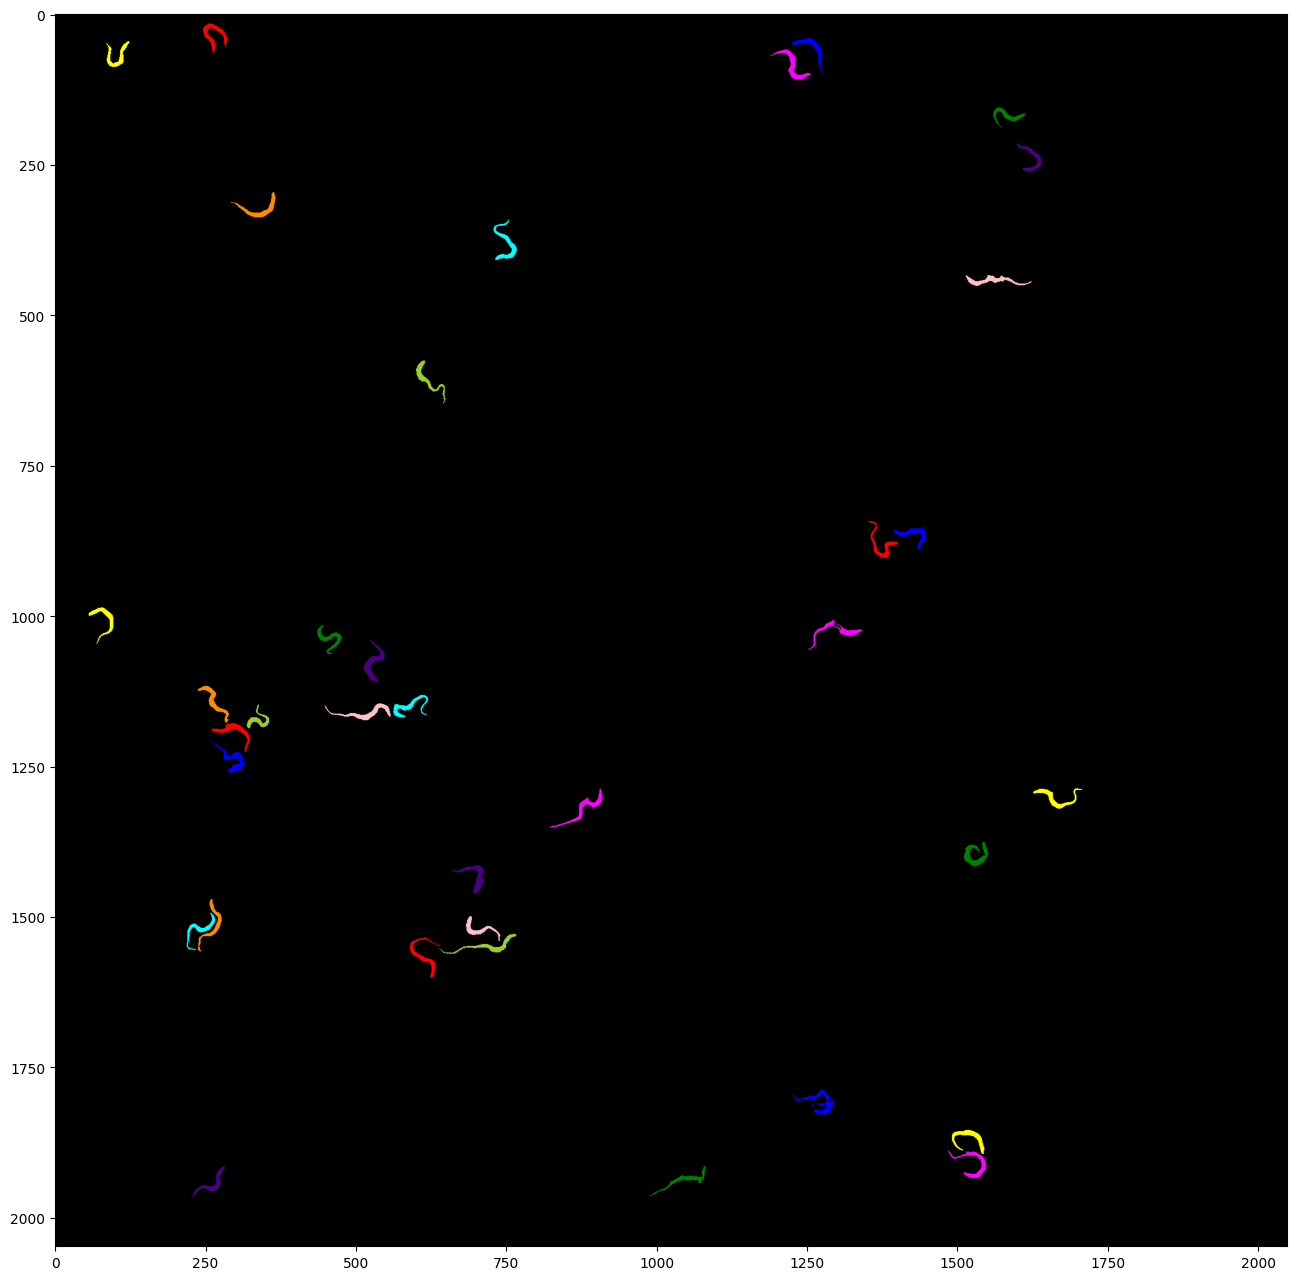


Your data has been saved as an excel worksheet within the working directory of your images. 
Analysis of the following images shall be appended to this worksheet. 


In [80]:
#Ask user to assign each channel as either DIC/Phase, AF488

DP_answers = ['d', 'p']
DP_answer  = 'none'
while DP_answer.lower() not in DP_answers:
    DP_answer = input("Are you using a DIC or Phase image? Type D (DIC) or P (Phase): ")

if DP_answer.lower() == 'd':
    D_answers = ['1', '2', '3', '4']
    dic_channel = 'none'
    while dic_channel not in D_answers:
        dic_channel = input("In which channel is your DIC image? (Check the above images to decide) Type 1, 2, 3, or 4: ")
    else:
        if dic_channel == "1":
            dic = np.array(channel1_data)
        elif dic_channel == "2":
            dic = np.array(channel2_data)
        elif dic_channel == "3":
            dic = np.array(channel3_data)
        elif dic_channel == "4":
            dic = np.array(channel4_data)
        dicwidth, dicheight = dic.shape
        plt.figure(figsize=(16,16))
        plt.suptitle("DIC", y=0.9)
        plt.imshow(dic, cmap='gray')

else:
    P_answers = ['1', '2', '3', '4']
    phase_channel = 'none' 
    while phase_channel not in P_answers:
        phase_channel = input("In which channel is your Phase image? (Check the above images to decide) Type 1, 2, 3, or 4: ")
    else:
        if phase_channel == "1":
            phase = np.array(channel1_data)
        elif phase_channel == "2":
            phase = np.array(channel2_data)
        elif phase_channel == "3":
            phase = np.array(channel3_data)
        elif phase_channel == "4":
            phase = np.array(channel4_data)
            
        phase_inverted = 65535 - phase

#Ask user to identify the AF488 channel
AF488_answers = ['1', '2', '3', '4']
AF488_channel = 'none'
while AF488_channel not in AF488_answers:
    AF488_channel = input("In which channel is your AF488 image? (Check the above images to decide) Type 1, 2, 3, or 4: ")
else:
    if AF488_channel == "1":
        AF488 = np.array(channel1_data)
    elif AF488_channel == "2":
        AF488 = np.array(channel2_data)
    elif AF488_channel == "3":
        AF488 = np.array(channel3_data)
    elif AF488_channel == "4":
        AF488 = np.array(channel4_data)
    
#This box makes a blurred phase image. This will be used for background subtraction.
#Click run.

blurred = gaussian_filter(phase_inverted, sigma=5)

#In order to subtract the background from the phase image, the blurred image is subtracted from the phase image.

sub_phase = cv2.subtract(phase_inverted,blurred)

#This box enhances the contrast of the image above.

spminpix, spmaxpix = np.min(sub_phase), np.max(sub_phase)
minO = 0
maxO = 65535

#The function which enhanced the contrast:
x = sub_phase
f = lambda x: (x - spminpix)*(((maxO-minO)/(spmaxpix-spminpix))+minO)
enhanced_phase = f(x)
enhanced_phase = enhanced_phase.astype(int)

#This box automatically determines an appropriate thresholding value and applies the threshold to make a binary image.

#Automatically determine threshold using Otsus method
t = skimage.filters.threshold_otsu(enhanced_phase)

#Apply the threshold
phase_mask = enhanced_phase > t

#This box fills any small holes within the trypanosome shapes.

phase_mask_filled = ndimage.binary_fill_holes(phase_mask, structure=None, output=None, origin=0)

#Filter out too small or too big particles.

min_size = 400
max_size = 750

#convert binary image to 0/1 image (1 is white)
phase_mask_filled_8bit = phase_mask_filled.astype(np.uint8)

# find all your connected components (white blobs in your image)
nb_components, output, stats, centroids = cv2.connectedComponentsWithStats(phase_mask_filled_8bit, connectivity=8)
# connectedComponentswithStats yields every seperated component with information on each of them, such as size
# the following part is just taking out the background which is also considered a component, but most of the time we don't want that.
sizes = stats[1:, -1]; nb_components = nb_components - 1

#The filtered image
phase_mask_filtered_8bit = phase_mask_filled_8bit
# for every component in the image, you keep it only if it's above min_size
for i in range(0, nb_components):
    if (sizes[i] < int(min_size)) or (sizes[i] > int(max_size)): 
        phase_mask_filtered_8bit[output == i + 1] = 0


#Converting back to a mask
phase_mask_filtered_8bit_mask = phase_mask_filtered_8bit > 0

#This box colours the trypanosomes so you can make sure that the majority of the trypanosomes are single trypanosomes and not clumps.

s = [[1,1,1],[1,1,1],[1,1,1]]
labeled_mask, num_labels = ndimage.label(phase_mask_filtered_8bit_mask, structure=s)
colored_phase_mask = color.label2rgb(labeled_mask, bg_label=0)

print("Here is a filtered mask of trypanosomes of which the fluorescence will be analysed. ")

fig, ax = plt.subplots()
fig.set_figheight(16)
fig.set_figwidth(16)
plt.imshow(colored_phase_mask)
plt.show()

#Create a table of the final data containing area and mean intensity of each area on the fluorescent channels.

props = measure.regionprops_table(labeled_mask, AF488, properties=['label', 'area', 'mean_intensity'])

df_AF488 = pd.DataFrame(props)

#Export data to excel worksheet

file_name_green = img_path.replace("\\", "/") + "/" + project_name + "AF488" + ".xlsx"
df_AF488.to_excel(file_name_green, index = False)

print("""
Your data has been saved as an excel worksheet within the working directory of your images. 
Analysis of the following images shall be appended to this worksheet. """)

In [81]:
###Now cycle through all the images in the folder with the above settings and save data as a csv file.

for image in glob.glob(img_path+"\\*.czi"):
    file = AICSImage(image)
    num_channels = file.shape[1]
    if num_channels > 4:
        print("THE MAX NUMBER OF ALLOWED CHANNELS FOR THIS ANALYSIS IS 4 (FOUR). YOU HAVE TOO MANY.")
        break
    elif num_channels == 1:
        channel1_data = file.get_image_data("ZYX", C=0, S=0, T=0)
        channel1_data = channel1_data[0,:,:] #Had to extract the 2048x2048 array from within the 3D array
    elif num_channels == 2:
        channel1_data = file.get_image_data("ZYX", C=0, S=0, T=0)
        channel1_data = channel1_data[0,:,:] #Had to extract the 2048x2048 array from within the 3D array          
        channel2_data = file.get_image_data("ZYX", C=1, S=0, T=0)
        channel2_data = channel2_data[0,:,:] #Had to extract the 2048x2048 array from within the 3D array    
    elif num_channels == 3:
        channel1_data = file.get_image_data("ZYX", C=0, S=0, T=0)
        channel1_data = channel1_data[0,:,:] #Had to extract the 2048x2048 array from within the 3D array          
        channel2_data = file.get_image_data("ZYX", C=1, S=0, T=0)
        channel2_data = channel2_data[0,:,:] #Had to extract the 2048x2048 array from within the 3D array  
        channel3_data = file.get_image_data("ZYX", C=2, S=0, T=0)
        channel3_data = channel3_data[0,:,:] #Had to extract the 2048x2048 array from within the 3D array
    elif num_channels == 4:
        channel1_data = file.get_image_data("ZYX", C=0, S=0, T=0)
        channel1_data = channel1_data[0,:,:] #Had to extract the 2048x2048 array from within the 3D array         
        channel2_data = file.get_image_data("ZYX", C=1, S=0, T=0)
        channel2_data = channel2_data[0,:,:] #Had to extract the 2048x2048 array from within the 3D array 
        channel3_data = file.get_image_data("ZYX", C=2, S=0, T=0)
        channel3_data = channel3_data[0,:,:] #Had to extract the 2048x2048 array from within the 3D array
        channel4_data = file.get_image_data("ZYX", C=3, S=0, T=0)
        channel4_data = channel4_data[0,:,:] #Had to extract the 2048x2048 array from within the 3D array
    else:
        print("You have no channels and cannot proceed with analysis.")
        break

    #Use the answers from the previous assessment

    DP_answers = ['d', 'p']
    DP_answer  = DP_answer
    while DP_answer.lower() not in DP_answers:
        DP_answer = DP_answer

    if DP_answer.lower() == 'd':
        D_answers = ['1', '2', '3', '4']
        dic_channel = dic_channel
        while dic_channel not in D_answers:
            dic_channel = dic_channel
        else:
            if dic_channel == "1":
                dic = np.array(channel1_data)
            elif dic_channel == "2":
                dic = np.array(channel2_data)
            elif dic_channel == "3":
                dic = np.array(channel3_data)
            elif dic_channel == "4":
                dic = np.array(channel4_data)
            dicwidth, dicheight = dic.shape

    else:
        P_answers = ['1', '2', '3', '4']
        phase_channel = phase_channel 
        while phase_channel not in P_answers:
            phase_channel = phase_channel
        else:
            if phase_channel == "1":
                phase = np.array(channel1_data)
            elif phase_channel == "2":
                phase = np.array(channel2_data)
            elif phase_channel == "3":
                phase = np.array(channel3_data)
            elif phase_channel == "4":
                phase = np.array(channel4_data)

            phase_inverted = 65535 - phase

    #Ask user to identify the AF488 channel
    AF488_answers = ['1', '2', '3', '4']
    AF488_channel = AF488_channel
    while AF488_channel not in AF488_answers:
        AF488_channel = AF488_channel
    else:
        if AF488_channel == "1":
            AF488 = np.array(channel1_data)
        elif AF488_channel == "2":
            AF488 = np.array(channel2_data)
        elif AF488_channel == "3":
            AF488 = np.array(channel3_data)
        elif AF488_channel == "4":
            AF488 = np.array(channel4_data)

    #This box makes a blurred phase image. This will be used for background subtraction.
    #Click run.

    blurred = gaussian_filter(phase_inverted, sigma=5)

    #In order to subtract the background from the phase image, the blurred image is subtracted from the phase image.

    sub_phase = cv2.subtract(phase_inverted,blurred)

    #This box enhances the contrast of the image above.

    spminpix, spmaxpix = np.min(sub_phase), np.max(sub_phase)
    minO = 0
    maxO = 65535

    #The function which enhanced the contrast:
    x = sub_phase
    f = lambda x: (x - spminpix)*(((maxO-minO)/(spmaxpix-spminpix))+minO)
    enhanced_phase = f(x)
    enhanced_phase = enhanced_phase.astype(int)

    #This box automatically determines an appropriate thresholding value and applies the threshold to make a binary image.

    #Automatically determine threshold using Otsus method
    t = skimage.filters.threshold_otsu(enhanced_phase)

    #Apply the threshold
    phase_mask = enhanced_phase > t

    #This box fills any small holes within the trypanosome shapes.

    phase_mask_filled = ndimage.binary_fill_holes(phase_mask, structure=None, output=None, origin=0)

    #Filter out too small or too big particles.

    min_size = 400
    max_size = 750

    #convert binary image to 0/1 image (1 is white)
    phase_mask_filled_8bit = phase_mask_filled.astype(np.uint8)

    # find all your connected components (white blobs in your image)
    nb_components, output, stats, centroids = cv2.connectedComponentsWithStats(phase_mask_filled_8bit, connectivity=8)
    # connectedComponentswithStats yields every seperated component with information on each of them, such as size
    # the following part is just taking out the background which is also considered a component, but most of the time we don't want that.
    sizes = stats[1:, -1]; nb_components = nb_components - 1

    #The filtered image
    phase_mask_filtered_8bit = phase_mask_filled_8bit
    # for every component in the image, you keep it only if it's above min_size
    for i in range(0, nb_components):
        if (sizes[i] < int(min_size)) or (sizes[i] > int(max_size)): 
            phase_mask_filtered_8bit[output == i + 1] = 0


    #Converting back to a mask
    phase_mask_filtered_8bit_mask = phase_mask_filtered_8bit > 0

    #This box colours the trypanosomes so you can make sure that the majority of the trypanosomes are single trypanosomes and not clumps.

    s = [[1,1,1],[1,1,1],[1,1,1]]
    labeled_mask, num_labels = ndimage.label(phase_mask_filtered_8bit_mask, structure=s)
    colored_phase_mask = color.label2rgb(labeled_mask, bg_label=0)

    #Create a table of the final data containing area and mean intensity of each area on the fluorescent channels.

    props = measure.regionprops_table(labeled_mask, AF488, properties=['label', 'area', 'mean_intensity'])

    df_AF488 = pd.DataFrame(props)

    #Export data to csv file
    
    import os.path
    file_path = img_path + "\measurements"
    if(os.path.isfile(file_path)):
        df_AF488.to_csv(file_path, sep = '|', mode='a', index= False,header=False)
    else:
       df_AF488.to_csv(file_path, sep = '|', index= False)

print("""
Your data have been saved as a csv file within the working directory of your images. 
""")


Your data have been saved as a csv file within the working directory of your images. 

